### 构建一个通用的多种群GA类，也可用于单种群GA，更复杂的模型可以继承该模型

In [1]:
import numpy as np
import random
import copy
import pandas as pd
import heapq
import os
import gc
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

PATH = os.path.abspath('.') 

In [ ]:
# 记录最优结果

"""
P1的最优解，85
[2, 1, 4, 3]
[[4, 4], [8], [2, 2, 2, 2], [3, 3, 2]]
[[2, 1, 0, 3], [1, 2, 0, 3], [3, 1, 0, 2], [2, 3, 0, 1], [2, 3, 0, 1], [2, 3, 0, 1]]

P2的最优解，182
[8, 2, 6, 2]
[[4, 1, 4, 3, 1, 1, 3, 3], [1, 19], [3, 2, 3, 4, 4, 4], [12, 8]]
[[1, 2, 3, 0], [1, 2, 0, 3], [3, 1, 0, 2], [3, 0, 2, 1], [2, 3, 1, 0], [2, 0, 1, 3]]

P3的最优解，201
[4, 5, 2, 6, 4, 5]
[[3, 2, 3, 2], [2, 3, 3, 1, 1], [6, 4], [1, 1, 2, 1, 3, 2], [2, 2, 4, 2], [2, 3, 2, 2, 1]]
[[2, 3, 1, 4, 5, 0], [1, 2, 5, 0, 4, 3], [1, 3, 4, 2, 5, 0], [2, 0, 5, 1, 4, 3], [5, 4, 2, 3, 1, 0], [4, 0, 1, 5, 3, 2]]

P4的最优解，389
[5, 8, 7, 6, 8, 8]
[[1, 7, 5, 5, 2], [3, 2, 2, 2, 3, 4, 1, 3], [4, 1, 3, 2, 2, 3, 5], [3, 4, 5, 3, 1, 4], [3, 2, 1, 4, 1, 4, 2, 3], [5, 2, 2, 1, 5, 3, 1, 1]]
[[2, 0, 4, 1, 3, 5], [0, 2, 1, 3, 4, 5], [1, 3, 5, 0, 2, 4], [0, 2, 1, 4, 5, 3], [4, 5, 3, 2, 1, 0], [1, 3, 0, 4, 5, 2]]

P5的最优解，31227
[3, 2, 28, 85, 43]
[[210, 195, 195], [296, 204], [64, 65, 63, 47, 74, 62, 58, 63, 56, 51, 59, 68, 69, 74, 70, 65, 70, 54, 62, 59, 66, 61, 62, 81, 67, 62, 77, 71], [23, 28, 18, 16, 24, 25, 17, 17, 32, 18, 19, 28, 26, 15, 25, 24, 19, 20, 26, 16, 33, 18, 25, 18, 25, 21, 27, 24, 28, 19, 26, 22, 18, 25, 30, 18, 16, 25, 20, 32, 22, 24, 23, 20, 30, 17, 36, 28, 19, 28, 22, 22, 22, 14, 19, 18, 23, 23, 14, 29, 30, 25, 32, 30, 33, 28, 22, 33, 23, 17, 30, 28, 21, 28, 17, 27, 21, 28, 21, 25, 19, 30, 30, 18, 25], [12, 17, 14, 12, 7, 10, 13, 10, 10, 10, 12, 16, 11, 10, 13, 13, 11, 8, 9, 14, 13, 12, 12, 12, 14, 13, 10, 14, 11, 9, 10, 14, 8, 10, 10, 9, 12, 12, 18, 9, 18, 8, 10]]
[[1, 2, 0, 4, 3], [4, 1, 3, 0, 2], [3, 2, 1, 4, 0], [1, 4, 0, 2, 3], [2, 0, 4, 1, 3], [3, 0, 2, 1, 4], [0, 3, 4, 1, 2], [4, 1, 0, 2, 3], [1, 2, 4, 3, 0], [4, 0, 1, 2, 3], [2, 3, 1, 4, 0], [1, 0, 2, 4, 3]]
"""

In [2]:
# 全局变量

problemInd = 2

""" 
problemInd               问题编号，需要手动指定
timeMatrix               每种lot的每个工序由不同的机器加工需要多少时间
preparingTimeMatrix      工序准备时间
lotNum                   有多少个lot
machineMatrix            每种lot的每个工序都可以由哪几台机器加工
lotOpeartionNumList      list，每种lot各有多少个工序
machineNum               有多少台机器
operationNumOfMachine    每台机器可以加工多少个不同的工序
"""


# P1：4X6问题，来自王海燕
if(problemInd == 1):
    timeMatrix=[ [ {0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 4, 2: 5} ],\
                 [ {0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11} ],\
                 [ {0: 5, 1: 6      }, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12} ],\
                 [ {0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3} ] ]

    preparingTimeMatrix=[ [ {0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 4, 2: 5} ],\
                          [ {0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11} ],\
                          [ {0: 5, 1: 6      }, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12} ],\
                          [ {0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3} ] ]

    lotSizes = [8,8,8,8]

# P2：4X6问题，来自王海燕
elif(problemInd == 2):
    timeMatrix=[ [ {0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 2, 2: 5} ],\
                 [ {0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11} ],\
                 [ {0: 5, 1: 6      }, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12} ],\
                 [ {0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3} ] ]

    preparingTimeMatrix=[ [ {0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 2, 2: 5} ],\
                          [ {0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11} ],\
                          [ {0: 5, 1: 6      }, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12} ],\
                          [ {0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3} ] ]

    lotSizes = [20,20,20,20]

# P3：6X6问题，来自王海燕
elif(problemInd == 3):
    timeMatrix=[ [ {0: 2}, {2: 3, 3: 2}, {1: 2, 3: 2, 4: 3, 5: 2}, {1: 5, 3: 6}, {2: 2, 5: 2}, {1: 1, 4: 1} ],\
                 [ {1: 2, 3: 1}, {2: 4}, {0: 8, 4: 7, 5: 7}, {1: 4, 2: 5, 3: 5}, {2: 1, 5: 1}, {1: 4, 4: 5} ],\
                 [ {0: 4, 2: 5}, {1: 5, 3: 5}, {2: 1, 4: 1}, {1: 6, 4: 7}, {1: 2, 2: 2, 5: 3} ],\
                 [ {0: 4, 3: 4}, {2: 2}, {1: 4, 3: 3, 5: 3}, {2: 6, 4: 5}, {0: 6}, {1: 3, 3: 2, 4: 2} ],\
                 [ {0: 2, 3: 3}, {1: 5, 4: 4}, {2: 1, 3: 1}, {2: 3, 5: 2}, {1: 3, 2: 2}, {4: 2} ],\
                 [ {0: 2, 2: 3, 4: 2}, {1: 4, 4: 3}, {3: 6, 5: 6}, {1: 2, 3: 2}, {2: 1}, {0: 2, 3: 3, 4: 2} ] ]

    preparingTimeMatrix =[ [ {0: 1}, {2: 2, 3: 1}, {1: 1, 3: 2, 4: 2, 5: 1}, {1: 3, 3: 2}, {2: 1, 5: 1}, {1: 1, 4: 1} ],\
                           [ {1: 1, 3: 1}, {2: 2}, {0: 2, 4: 2, 5: 3}, {1: 2, 2: 1, 3: 2}, {2: 1, 5: 1}, {1: 2, 4: 1} ],\
                           [ {0: 2, 2: 2}, {1: 3, 3: 2}, {2: 1, 4: 1}, {1: 3, 4: 2}, {1: 2, 2: 1, 5: 1} ],\
                           [ {0: 2, 3: 1}, {2: 1}, {1: 1, 3: 1, 5: 1}, {2: 2, 4: 2}, {0: 1}, {1: 1, 3: 2, 4: 1} ],\
                           [ {0: 1, 3: 1}, {1: 1, 4: 1}, {2: 1, 3: 1}, {2: 1, 5: 1}, {1: 1, 2: 2}, {4: 2} ],\
                           [ {0: 1, 2: 1, 4: 2}, {1: 1, 4: 2}, {3: 2, 5: 1}, {1: 1, 3: 1}, {2: 2}, {0: 2, 3: 1, 4: 2} ] ]
    lotSizes = [10,10,10,10,10,10]

# P4：6X6问题，来自王海燕
elif(problemInd == 4):
    timeMatrix=[ [ {0: 2}, {2: 3, 3: 2}, {1: 2, 3: 2, 4: 3, 5: 2}, {1: 5, 3: 6}, {2: 2, 5: 2}, {1: 1, 4: 1} ],\
                 [ {1: 2, 3: 1}, {2: 4}, {0: 8, 4: 7, 5: 7}, {1: 4, 2: 5, 3: 5}, {2: 1, 5: 1}, {1: 4, 4: 5} ],\
                 [ {0: 4, 2: 5}, {1: 5, 3: 5}, {2: 1, 4: 1}, {1: 6, 4: 7}, {1: 2, 2: 2, 5: 3} ],\
                 [ {0: 4, 3: 4}, {2: 2}, {1: 4, 3: 3, 5: 3}, {2: 6, 4: 5}, {0: 6}, {1: 3, 3: 2, 4: 2} ],\
                 [ {0: 2, 3: 3}, {1: 4, 4: 4}, {2: 1, 3: 1}, {2: 3, 5: 2}, {1: 3, 2: 2}, {4: 2} ],\
                 [ {0: 2, 2: 3, 4: 2}, {1: 4, 4: 3}, {3: 6, 5: 6}, {1: 2, 3: 2}, {2: 1}, {0: 2, 3: 3, 4: 2} ] ]

    preparingTimeMatrix =[ [ {0: 1}, {2: 2, 3: 1}, {1: 1, 3: 2, 4: 2, 5: 1}, {1: 3, 3: 2}, {2: 1, 5: 1}, {1: 1, 4: 1} ],\
                           [ {1: 1, 3: 1}, {2: 2}, {0: 2, 4: 2, 5: 3}, {1: 2, 2: 1, 3: 2}, {2: 1, 5: 1}, {1: 2, 4: 1} ],\
                           [ {0: 2, 2: 2}, {1: 3, 3: 2}, {2: 1, 4: 1}, {1: 3, 4: 2}, {1: 2, 2: 1, 5: 1} ],\
                           [ {0: 2, 3: 1}, {2: 1}, {1: 1, 3: 1, 5: 1}, {2: 2, 4: 2}, {0: 1}, {1: 1, 3: 2, 4: 1} ],\
                           [ {0: 1, 3: 1}, {1: 1, 4: 1}, {2: 1, 3: 1}, {2: 1, 5: 1}, {1: 1, 2: 2}, {4: 2} ],\
                           [ {0: 1, 2: 1, 4: 2}, {1: 1, 4: 2}, {3: 2, 5: 1}, {1: 1, 3: 1}, {2: 2}, {0: 2, 3: 1, 4: 2} ] ]
    lotSizes = [20,20,20,20,20,20]
    
# P5：5X12问题，来自ZHAO
elif(problemInd == 5):
    timeMatrix=[ [ {5: 5, 6: 7, 7: 8}, {4: 10}, {3: 2}, {4: 5}, {10: 12, 11: 14} ],\
                 [ {5: 5, 6: 9, 7: 6}, {8: 3, 9: 4}, {1: 4, 2: 4}, {1: 15, 2: 7}, {1: 5, 2: 5}, {10: 10, 11: 8} ],\
                 [ {5: 5, 6: 7, 7: 8}, {5: 6, 6: 6, 7: 10}, {8: 4, 9: 5}, {1: 15, 2: 14}, {1: 5, 2: 3}, {10: 10, 11: 11} ],\
                 [ {4: 6}, {0: 4}, {8: 3, 9: 5}, {4: 5}, {10: 6, 11: 9} ],\
                 [ {5: 5, 6: 6, 7: 6}, {5: 5, 6: 5, 7: 6}, {8: 5, 9: 5}, {3: 6}, {1: 9, 2: 10}, {1: 5, 2: 4}, {10: 9, 11: 10} ] ]

    preparingTimeMatrix =[ [ {5: 5, 6: 5, 7: 5}, {4: 2}, {3: 4}, {4: 2}, {10: 0, 11: 0} ],\
                           [ {5: 5, 6: 4, 7: 7}, {8: 0, 9: 0}, {1: 8, 2: 3}, {1: 4, 2: 7}, {1: 3, 2: 3}, {10: 0, 11: 0} ],\
                           [ {5: 4, 6: 6, 7: 6}, {5: 6, 6: 8, 7: 6}, {8: 0, 9: 0}, {1: 5, 2: 3}, {1: 3, 2: 1}, {10: 0, 11: 0} ],\
                           [ {4: 2}, {0: 2}, {8: 0, 9: 0}, {4: 3}, {10: 0, 11: 0} ],\
                           [ {5: 4, 6: 4, 7: 5}, {5: 6, 6: 6, 7: 6}, {8: 0, 9: 0}, {3: 4}, {1: 2, 2: 4}, {1: 2, 2: 2}, {10: 0, 11: 0} ] ]
    lotSizes = [600,500,1800,2000,500]




# 由上面两个矩阵计算得到一些全局变量
lotNum = len(timeMatrix)

machineMatrix = [ [ [item for item in operation.keys()] for operation in lot ] for lot in timeMatrix ]

lotOpeartionNumList = [len(item) for item in timeMatrix]


            
temp1 = []
temp2 = [] 
operationNumOfMachine = []
for i, item in enumerate(timeMatrix):
    temp1.extend(item * lotSizes[i])
for i, item in enumerate(temp1):
    temp1[i] = list(item.keys())
for item in temp1:
    temp2.extend(item)
    
machineNum = len(set(temp2))    

for i in range(machineNum):
    operationNumOfMachine.append(temp2.count(i))
    

# 打印上述所有参数
print('timeMatrix: ')
for item in timeMatrix:
    print(item)
print('preparingTimeMatrix: ')
for item in preparingTimeMatrix:
    print(item)
print('lotSizes: ', lotSizes)
print('lotNum: ', lotNum)
print('machineMatrix: ')
for item in machineMatrix:
    print(item)
print('lotOpeartionNumList: ', lotOpeartionNumList)
print('machineNum: ', machineNum)
print('operationNumOfMachine: ', operationNumOfMachine)

timeMatrix: 
[{0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 2, 2: 5}]
[{0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11}]
[{0: 5, 1: 6}, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12}]
[{0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3}]
preparingTimeMatrix: 
[{0: 2, 1: 3, 2: 4}, {1: 3, 3: 2, 4: 4}, {0: 1, 1: 2, 2: 5}]
[{0: 3, 2: 5, 4: 2}, {0: 4, 1: 3, 4: 6}, {2: 4, 4: 7, 5: 11}]
[{0: 5, 1: 6}, {1: 4, 3: 3, 4: 5}, {2: 13, 4: 9, 5: 12}]
[{0: 9, 2: 7, 3: 9}, {1: 6, 3: 4, 5: 5}, {0: 1, 2: 3, 5: 3}]
lotSizes:  [20, 20, 20, 20]
lotNum:  4
machineMatrix: 
[[0, 1, 2], [1, 3, 4], [0, 1, 2]]
[[0, 2, 4], [0, 1, 4], [2, 4, 5]]
[[0, 1], [1, 3, 4], [2, 4, 5]]
[[0, 2, 3], [1, 3, 5], [0, 2, 5]]
lotOpeartionNumList:  [3, 3, 3, 3]
machineNum:  6
operationNumOfMachine:  [140, 140, 140, 80, 120, 80]


In [144]:
chooseTwoNumByTournament([194, 183, 204, 200, 185, 189, 189, 189, 199, 189, 197], 3)

(1, 6)

In [172]:
chooseTwoNumByRandom(65)

(27, 22)

In [171]:
# 一些全局函数

def calRoulette(makespanList):
    """
    由完工时间列表计算轮盘
    makespanList  输入一个完工时间的list
    roulette      输出一个轮盘概率list
    """
    makespanMax = max(makespanList)
    for i in range(len(makespanList)):
        makespanList[i] = makespanMax - makespanList[i] + 1
#     makespanList = calfitness(makespanList)
    makespanSum = sum(makespanList)    
    for i in range(len(makespanList)):
        makespanList[i] /=  makespanSum
    roulette = []
    temp = 0
    for i in range(len(makespanList)):
        temp += makespanList[i]
        roulette.append(temp)
    return roulette


def calfitness(makespanList):
    """
    功能：          由makespan计算fitness
    
    输入：
    makespanList    输入一个完工时间的list
    
    输出：
    fitnessList     输出一个轮盘概率list
    """
    makespanMax = max(makespanList)
    fitnessList = []
    for i in range(len(makespanList)):
        fitnessList.append(makespanMax - makespanList[i] + 1)
        
    return fitnessList


def chooseTwoNumByRandom(N):
    """
    功能：         随机选择两个不重复的[0,N]的随机整数
    
    输出：
    pos1, pos2     两个随机整数
    """
    pos1 = random.randint(0, N)
    pos2 = random.randint(0, N)
    while pos1 == pos2:
        pos2 = random.randint(0, N)
        
    return pos1, pos2


def chooseOneNumByTournament(makespanList, N):
    """
    功能：          用锦标赛法选择一个个体，即从随机N个体中选出最好的一个个体
    
    输入：
    makespanList    输入一个完工时间的list
    N               随机个体的个数，一般为3
    
    输出：
    chosenIndex     被选中的个体的序号，范围为[0,len(makespanList)-1]
    """
    competitorsIndexs = [random.randint(0, len(makespanList) - 1) for i in range(N)]
    competitorsMakespans = [makespanList[item] for item in competitorsIndexs]
    
    return competitorsIndexs[competitorsMakespans.index(min(competitorsMakespans))]
    
    
def chooseTwoNumByTournament(makespanList, N):
    """ 
    功能：          用锦标赛法选出两个不同的个体
    
    输入：
    makespanList    输入一个完工时间的list
    N               随机个体的个数，一般为3
    
    输出：
    chosenIndexs     被选中的两个个体的序号，范围为[0,len(makespanList)-1]
    """
    pos1 = chooseOneNumByTournament(makespanList, N)
    pos2 = chooseOneNumByTournament(makespanList, N)
    while pos1 == pos2:
        pos2 = chooseOneNumByTournament(makespanList, N)
        
    return pos1, pos2


def chooseOneNumByRoulette(roulette):
    """
    用轮盘来随机选取一个数
    roulette      输入一个轮盘概率list
    i             输出一个[0,len(roulette)-1]的随机数
    """    
    randNum = random.random()
    for i in range(len(roulette)):
        if(randNum < roulette[i]):
            break
    return i


def chooseTwoNumByRoulette(roulette): 
    """
    用轮盘赌来随机选取两个不同的数
    roulette      输入一个轮盘概率list
    pos1, pos2    输出两个不同的[0,len(roulette)-1]的随机数
    """
    pos1 = chooseOneNumByRoulette(roulette)
    pos2 = chooseOneNumByRoulette(roulette)
    while(pos1 == pos2):
        pos2 = chooseOneNumByRoulette(roulette)
    return pos1, pos2


def getBestOrWorstIndexs(mode, makespanList, indNum):
    
    """
    功能：         找出给定makespanList中最好或者最坏的indNum个个体
    
    输入：
    mode           选择模式，可以是'best','worst'
    makespanList   list，给定完工时间列表
    indNum         要选出多少个
    
    输出：
    indexs         一个list，里面是individual在pop中的序号
    """
    
    indexs = []
    temp = copy.deepcopy(makespanList)
    
    if mode == 'best':
        Inf = 99999999
        for i in range(indNum):
            indexs.append(temp.index(min(temp)))
            temp[temp.index(min(temp))]=Inf
    elif mode == 'worst':
        Inf = 0
        for i in range(indNum):
            indexs.append(temp.index(max(temp)))
            temp[temp.index(max(temp))]=Inf
            
    return indexs


In [4]:
# 一个lot的lotSplitingVector

class singleLotSplitingVec:
    
    """
    类含义：          一个lot的分批情况
    
    成员变量：
    self.lotSize      本批共有多少个工件
    self.sublotNum    子批数
    self.sublotSizes  list，每个子批包含多少个工件
    """
    
    def __init__(self, lotSize):
        """
        输入：
        lotSize     本批共有多少个工件
        """
        self.lotSize = lotSize

        
    def initializeLotSplitingVec(self):
        """
        功能：     随机初始化一个批的分批方案向量
        
        注意：     创建对象后需要使用该函数初始化后才有self.sublotNum和self.sublotSizes成员变量
        """
        # 随机生成子批数量，可限制子批数量，也可以不限制子批数量
#         self.sublotNum = random.randint(1, int(np.log2(self.lotSize)))  
#         self.sublotNum = random.randint(1, 2 * int(np.sqrt(self.lotSize)))  
#         self.lotNum = random.randint(1, self.lotSize)  # 
        if(self.lotSize > 100):
            self.sublotNum = random.randint(1, 2 * int(np.sqrt(100)))  # 超100的就不分那么多sublot了
        else:
            self.sublotNum = random.randint(1, 2 * int(np.sqrt(self.lotSize)))  
         
        # 随机生成每一个子批的批量
        self.sublotSizes = [1] * self.sublotNum
        cnt = self.sublotNum
        while(cnt < self.lotSize):
            self.sublotSizes[random.randint(1, self.sublotNum) - 1] += 1
            cnt += 1
    
    
    def mutateTwoSublot(self):
        """
        功能：      lot内变异两个sublot的size，即变异一个分批方案向量
        随机选择两个子批，重新随机生成这两个子批的批量，使之与变异前不同
        """
        if(self.sublotNum > 1):   # 当子批数大于1的时候，才可以发生变异  
            # 随机选择两个子批
            pos1 = random.randint(1, self.sublotNum) - 1
            pos2 = random.randint(1, self.sublotNum) - 1
            while(pos1 == pos2):
                pos2 = random.randint(1, self.sublotNum) - 1

            # 重新生成两个子批的批量数
            sumSize = self.sublotSizes[pos1] + self.sublotSizes[pos2]
            if(sumSize > 3):  # 如果选中的是两个1的sublot，或者是一个1一个2的sublot，则不进行变异，如果不是这种情况，才有以下的变异
                newSize1 = random.randint(1, sumSize - 1)
                while(newSize1 == self.sublotSizes[pos1] or newSize1 == self.sublotSizes[pos2]):
                    newSize1 = random.randint(1, sumSize - 1)
                self.sublotSizes[pos1] = newSize1
                self.sublotSizes[pos2] = sumSize - newSize1


In [5]:
# 一个个体所有lot的lotSplitingCode

class individualLotSplitingCode:
    
    def __init__(self, lotNum, lotSizes):
        """
        self.lotNum  一个个体有多少个lot
        self.lotSizes  list，每个lot有多少个工件
        """
        self.lotNum = lotNum
        self.lotSizes = lotSizes
        
    def initilizeLotSplitingCode(self):
        """
        根据lotSizes初始化lotNum个lotSplitingVec，随机初始化
        self.lotSplitingCode  list，一个个体所有lot的lotSplitingVec组成的list
        """
        self.lotSplitingCode = []
        for num in self.lotSizes:
            self.lotSplitingCode.append(singleLotSplitingVec(num))
        for item in self.lotSplitingCode:
            item.initializeLotSplitingVec()
            
    def mutateWithinLotWithTwoSublots(self, p):
        """
        按照概率p来随机抽取lot进行lot内两个sublotSize的变异
        p  单个Vec变异的概率
        """
        for item in self.lotSplitingCode:
            if(random.random() < p):
                item.mutateTwoSublot()
                
    def mutateWithinLotWithNewVec(self, p):
        """
        按照概率p来随机抽取lot进行lot内分批方案vec重新随机初始化
        p  单个Vec变异的概率
        """
        for item in self.lotSplitingCode:
            if(random.random() < p):
                item.initializeLotSplitingVec()
                  

In [6]:
# 一个个体所有机器的preferenceCode

class individualPreferenceCode:
    """
    注意：lot号从0开始数
    """
    
    def __init__(self, machineNum, lotNum):
        """
        self.machineNum  机器数量
        self.lotNum  一个个体有多少个lot
        """
        self.machineNum = machineNum
        self.lotNum = lotNum
        
    def initilizePreferenceCode(self):
        """
        随机初始化self.machineNum台机器的preferenceCode
        self.preferenceCode list，一个个体所有机器的preferenceVec组成的list
        """
        self.preferenceCode = []        
        for i in range(self.machineNum):
            preferenceVec = [item for item in range(self.lotNum)]
            random.shuffle(preferenceVec)
            self.preferenceCode.append(preferenceVec)
            
    def mutateWithinVecWithSwap(self, p):
        """
        按照概率p选取机器的preferenceVec进行Vec内两点swap
        p  单个Vec变异的概率
        """
        for item in self.preferenceCode:
            if(random.random() < p):                
                pos1 = random.randint(1, self.lotNum) - 1
                pos2 = random.randint(1, self.lotNum) - 1
                while(pos1 == pos2):
                    pos2 = random.randint(1, self.lotNum) - 1
                item[pos1], item[pos2] = item[pos2], item[pos1]
                
    def mutateBetweenVecsWithSwap(self):
        """
        随机抽取两个preferenceVec，swap
        """
        pos1 = random.randint(1, self.machineNum) - 1
        pos2 = random.randint(1, self.machineNum) - 1
        while(pos1 == pos2):
            pos2 = random.randint(1, self.machineNum) - 1
        self.preferenceCode[pos1], self.preferenceCode[pos2] = self.preferenceCode[pos2], self.preferenceCode[pos1]

In [8]:
# 机器类

class machine:
    
    def __init__(self):
        """
        self.idleMoment  从此刻开始，机器空闲了
        self.assignedList  list，已经被安排到该机器的工件，格式为[lot号，sublot号，sublot工件数，工序号]
        self.idlePeriods  该机器的空闲时间段，格式为[起始时间，结束时间]
        self.waitingList  从solution对象属性allMachineWaitingList中挑选出来符合条件的待加工工序
        self.waitingListTime  self.waitingList对应的时间list，里面每一个时间表示，idleMoment后多少时间之后，该sublot的该工序完成，
                            此时间包含等待时间和工序准备时间（如果有的话）
        self.waitingListTimePreparing   每个工序的工序准备时间，如果跟上一个工序lot类型一样的话，为0
        self.chosenOperation  本机器本次所选择的工序
        self.chosenOperationTime  本机器所选择的的工序所需时间
        """
        self.idleMoment = 0
        self.assignedList = []
        self.idlePeriods = []
        
        self.waitingList = []
        self.waitingListTime = []
        self.waitingListTimePreparing = []
        self.chosenOperation = 0
        self.chosenOperationTime = 0        

In [9]:
# 解码算子类，传入generalIndividual

class generalSolution:
    
    def __init__(self, generalIndividual):
        """
        self.machineList  由self.machineNum个machine对象构成的list
        self.allMachineWaitingList  待加工的工序构成的list，每个元素格式为[lot号，sublot号，sublotSize，工序号，可以开始加工的时间]
        self.idleMomentList  每台机器的idletime，从self.machineList同步而来，用来方便选择下一台需要安排工件的机器
        self.sublotOperationAssignment  每个sublot的每个工序都由哪个机器加工，起止时间是多少，每个元素格式为[机器号，起始时间，结束时间]
        """
        # 从generalIndividual同步而来的信息
        self.lotSplitingCode = [item.sublotSizes for item in generalIndividual.segment1.lotSplitingCode]
        self.preferenceCode = generalIndividual.segment2.preferenceCode
        self.lotNum = generalIndividual.lotNum
        self.machineNum = generalIndividual.machineNum
        
        # 下面是主要变量
        self.machineList = [machine() for i in range(self.machineNum)]     
        self.idleMomentList = [item.idleMoment for item in self.machineList]
        self.allMachineWaitingList = []   
        self.sublotOperationAssignment = [[[] for sublot in lot] for lot in self.lotSplitingCode]
        
        
    def assignCodesToSolution(self, sublotSizes, preferenceCode):
        """
        功能：      直接给定sublotSizes, preferenceCode，方便后面根据此码解码调度
        """        
        self.lotSplitingCode = sublotSizes
        self.preferenceCode = preferenceCode
        
        
    def initializeAllMachineWaitingList(self):
        """
        把所有lot的所有sublot的工序0放入self.allMachineWaitingList
        """
        for lotInd, lot in enumerate(self.lotSplitingCode):
            for sublotInd, sublotSize in enumerate(lot):
                self.allMachineWaitingList.append([lotInd, sublotInd, sublotSize, 0, 0])
                
    def chooseTheNextMachine(self):
        """
        self.idleMomentList一定要在每次选机器前重新由self.machineList生成出来，不能偷懒
        chosenIndex  返回值，是选中的机器的index
        后面可以补充：
        ①相同idleMoment的多台机器，加入规则选择好的一个，而不是随便选
        """
        self.idleMomentList = [item.idleMoment for item in self.machineList]
        
        # 选出最先idle的，且能加工工序类别总数最少的机器
        alternativeMachine = []
        for i, item in enumerate(self.idleMomentList):
            if(item == min(self.idleMomentList)):
                alternativeMachine.append(i)
        alternativeMachinePriority = [operationNumOfMachine[i] for i in alternativeMachine]
        chosenIndex = alternativeMachine[alternativeMachinePriority.index(min(alternativeMachinePriority))]

        # 选择最先idle的机器
#         chosenIndex = self.idleMomentList.index(min(self.idleMomentList))
        
        return chosenIndex
    
    def generateWaitingList(self, machineInd, usePreparingTime = 1):
        """
        对一台机器生成waitingList和waitingListTime，即从allMachineWaitingList选出符合条件的工序
        machineInd  是机器的号码，从0开始数
        usePreparingTime  是否使用工序准备时间
        """
        # 先清空该机器的waitingList和waitingListTime
        self.machineList[machineInd].waitingList = []
        self.machineList[machineInd].waitingListTime = []
        self.machineList[machineInd].waitingListTimePreparing = []
        
        # 构建waitingList        
        # 选择能给该机器加工，而且在idleMoment时刻已经能开始加工，或者在idleMoment可以提前工序准备的工件
        if(usePreparingTime == 1):
            for item in self.allMachineWaitingList:
                if(machineInd in machineMatrix[item[0]][item[3]] \
                   and item[4] - self.machineList[machineInd].idleMoment \
                   <= preparingTimeMatrix[item[0]][item[3]][machineInd]):
                    self.machineList[machineInd].waitingList.append(item)
        # 选择能给该机器加工，而且在idleMoment时刻已经能开始加工的工件
        else:
            for item in self.allMachineWaitingList:
                if(machineInd in machineMatrix[item[0]][item[3]] and item[4] <= self.machineList[machineInd].idleMoment):
                    self.machineList[machineInd].waitingList.append(item)      
        
        # 构建和waitingListTime
        for item in self.machineList[machineInd].waitingList:
            tempTime = timeMatrix[item[0]][item[3]][machineInd]*item[2]          
            # 如果算上工序准备时间，考虑提前工序准备，要对tempTime进行如下改造
            if(usePreparingTime == 1):                  
                # 与上一个工序为非同类
                if not (len(self.machineList[machineInd].assignedList) > 0 \
                        and item[0] == self.machineList[machineInd].assignedList[-1][0]): 
                    tempTime += preparingTimeMatrix[item[0]][item[3]][machineInd] 
                    self.machineList[machineInd].waitingListTimePreparing.\
                    append(preparingTimeMatrix[item[0]][item[3]][machineInd])
    
    
                # 与上一个工序为同类
                else:
                    if (self.machineList[machineInd].idleMoment < item[4]):
                        tempTime += (item[4] - self.machineList[machineInd].idleMoment)
                    self.machineList[machineInd].waitingListTimePreparing.append(0)
            self.machineList[machineInd].waitingListTime.append(tempTime)
                    
            
    def chooseAndAssignOperation(self, machineInd, usePreference = 1):
        """
        让一台机器从其waitingList选择一个工序，并插入到时间轴中，并维护self.allMachineWaitingList
        后面可以补充：
        ①用时相同的多个工序，加入规则选择好的一个，而不是选完工时间最小的那个
        ②插入时间轴前，检查空闲时间段能不能插入
        machineInd  是机器的号码，从0开始数
        usePreference  是否使用PreferenceCode来指导工件选择
        """                        
        # 如果使用Preference来选择工件的话，要重新生成waitingList和waitingListTime
        if(usePreference == 1 and len(self.machineList[machineInd].waitingList) != 0):
            # 从该机器的waitingList选择该机器偏好度最靠前的工序集合，放在tempList中
            for ind in self.preferenceCode[machineInd]:
                tempList = []
                tempListTime = []
                waitingListTimePreparing = []
                for i,item in enumerate(self.machineList[machineInd].waitingList):
                    if(item[0] == ind):
                        tempList.append(item)
                        tempListTime.append(self.machineList[machineInd].waitingListTime[i])
                        waitingListTimePreparing.append(self.machineList[machineInd].waitingListTimePreparing[i])
                if(len(tempList) > 0):
                    break
            # 用tempList覆盖掉该机器的waitingList和waitingListTime
            self.machineList[machineInd].waitingList = tempList
            self.machineList[machineInd].waitingListTime = tempListTime
            self.machineList[machineInd].waitingListTimePreparing = waitingListTimePreparing
        
        # 如果waitinglist有元素，选择一个来加工
        if(len(self.machineList[machineInd].waitingList) != 0):                                
            # 选择工序、工序在waitingList里面的序号、sublot该工序的加工时间
            index = self.machineList[machineInd].waitingListTime.index(min(self.machineList[machineInd].waitingListTime))
#             index = [item[2] for item in self.machineList[machineInd].waitingList].index(max([item[2] for item in self.machineList[machineInd].waitingList]))
            operation = self.machineList[machineInd].waitingList[index]
            time = self.machineList[machineInd].waitingListTime[index] 
            timePreparing = self.machineList[machineInd].waitingListTimePreparing[index]
            # 更新相关信息
            self.machineList[machineInd].chosenOperation = operation
            self.machineList[machineInd].chosenOperationTime = time       
#             self.machineList[machineInd].assignedList.append(operation) 
            # (lot号，sublot号，工件数，工序号，最早看额开始时间，实际开始时间，实际结束时间，准备工序时间)
            self.machineList[machineInd].assignedList.\
    append(operation[:] + [self.machineList[machineInd].idleMoment, self.machineList[machineInd].idleMoment + time, timePreparing])  
            # 插入到时间轴里，更新idleMoment
            self.machineList[machineInd].idleMoment += time 
            # 更新各种信息
            self.sublotOperationAssignment[operation[0]][operation[1]].\
        append([machineInd, self.machineList[machineInd].idleMoment - time, self.machineList[machineInd].idleMoment])            
            # 将该工序从self.allMachineWaitingList删除，将该sublot的下一个工序加入self.allMachineWaitingList
            self.allMachineWaitingList.remove(operation)
            if operation[3] != lotOpeartionNumList[operation[0]] - 1:
                self.allMachineWaitingList.append(operation[:3][:]+[operation[3]+1, self.machineList[machineInd].idleMoment])
        # 如果waitinglist没有元素，那么把idleMoment加入到idlePeriods
        else:  
            self.machineList[machineInd].idleMoment += 1
            self.machineList[machineInd].chosenOperation = 0
            self.machineList[machineInd].chosenOperationTime = 0
            if(len(self.machineList[machineInd].idlePeriods) != 0 and self.machineList[machineInd].idlePeriods[-1][-1] == self.machineList[machineInd].idleMoment - 1):  #  如果最新一段空闲时间段跟此刻idleMoment是连续的，那么在那基础上扩展就行
                self.machineList[machineInd].idlePeriods[-1][-1] = self.machineList[machineInd].idleMoment
            else:
                self.machineList[machineInd].idlePeriods.append([self.machineList[machineInd].idleMoment-1, self.machineList[machineInd].idleMoment])

    def run(self, mute = 1):
        """
        自动求解调度方案
        mute  等于1时，不打印求解过程
        """
        #  初始化
        self.initializeAllMachineWaitingList()
        if(mute != 1):
            print('allMachineWaitingList: ', self.allMachineWaitingList)
        
        #  开始循环求解
#         for i in range(80):
        while(len(self.allMachineWaitingList) != 0):
        
            chosenMachine = self.chooseTheNextMachine()
            
            if(mute != 1):
                print('idleMomentList: ', self.idleMomentList)
                print('chosenMachine: ', chosenMachine)
            
            self.generateWaitingList(machineInd = chosenMachine)
            
            if(mute != 1):
                print('waitingList: ', self.machineList[chosenMachine].waitingList)
                print('waitingListTime: ', self.machineList[chosenMachine].waitingListTime)
                print('waitingListTimePreparing: ', self.machineList[chosenMachine].waitingListTimePreparing)
                        
            self.chooseAndAssignOperation(chosenMachine)
            
            if(mute != 1):
                print('waitingList: ', self.machineList[chosenMachine].waitingList)
                print('waitingListTime: ', self.machineList[chosenMachine].waitingListTime)

                print('chosenOperation: ', self.machineList[chosenMachine].chosenOperation)
                print('chosenOperationTime: ', self.machineList[chosenMachine].chosenOperationTime)

                print('assignedList: ', self.machineList[chosenMachine].assignedList)
                print('idleMoment: ', self.machineList[chosenMachine].idleMoment)
                print('idlePeriods: ', self.machineList[chosenMachine].idlePeriods)
                print('allMachineWaitingList: ', self.allMachineWaitingList)
                print('sublotOperationAssignment', self.sublotOperationAssignment)
                print(' ')
                
        # 最后把多余的idlePeriods删掉，才能得到准确的idleMoment和idlePeriods
        for i in range(self.machineNum):
            if(len(self.machineList[i].idlePeriods) != 0):
                if(self.machineList[i].idlePeriods[-1][-1] == self.machineList[i].idleMoment):
                    self.machineList[i].idleMoment = self.machineList[i].idlePeriods[-1][0]
                    del(self.machineList[i].idlePeriods[-1])
            
    def printResults(self):
        """
        打印run()的调度方案信息
        """
        print('assignment for each machine')
        for i,item in enumerate(self.machineList):
            print('for machine %i: '%i, item.assignedList)
        print('idlePeriods for each machine')
        for i,item in enumerate(self.machineList):
            print('for machine %i: '%i, item.idlePeriods)
        print('completion time for each machine: ', [item.idleMoment for item in self.machineList])
        print('total completion time: ', max([item.idleMoment for item in self.machineList]))
        print('sublotOperationAssignment for each sublot:')
        for i,lot in enumerate(self.sublotOperationAssignment):
            print('for lot%d: '%i)
            print(lot)
            
    
    def getMakespan(self):
        """
        返回完工时间
        """
        return max([item.idleMoment for item in self.machineList])
    
    
    def generateGantTimetable(self, filename = 'gantData.csv'):
        """
        为该solution生成甘特图时间表
        filename  csv文件路径
        """
        gantData = []
        for machInd, machine in enumerate(self.machineList):
            for item in machine.assignedList:
                if(item[7] != 0):
                    gantData.append(['M%d'%machInd, item[5], item[5] + item[7], '*'])
                gantData.append(['M%d'%machInd, item[5] + item[7], item[6], \
                                 '{lotInd}-{sublotInd}-{operationInd}'.format(lotInd = item[0], sublotInd = item[1], operationInd = item[3])])
        df = pd.DataFrame(gantData, columns=["Machine", "Start", "Finish","Title"])
        df.to_csv(PATH+"\\"+filename, header = False)
        print('gantChart timetable', filename, 'done: {}'.format(PATH+"\\"+filename))

            
   

In [86]:
# 一个完整的个体

class generalIndividual:
    
    def __init__(self, lotNum, lotSizes, machineNum):
        """
        self.lotNum  有多少个lot
        self.lotSizes  list，每个lot有多少个工件
        self.machineNum  有多少个机器
        """
        self.lotNum = lotNum
        self.lotSizes = lotSizes
        self.machineNum = machineNum
        
    def initializeIndividual(self):
        """
        随机初始化一个个体的两段编码
        self.segment1  S1,分批段
        self.segment2  S2,偏好段
        self.makespan  该个体的完工时间，初始值为一个很大的数
        """
        self.segment1 = individualLotSplitingCode(self.lotNum, self.lotSizes)
        self.segment1.initilizeLotSplitingCode()
        self.segment2 = individualPreferenceCode(self.machineNum, self.lotNum)
        self.segment2.initilizePreferenceCode()
        self.makespan = 100000
        
    def mutateSegment1WithTwoSublots(self, p):
        """
        按照概率p随机选择lotSplitingVec，对其随机两个sublot的size扰动
        p  单个Vec变异的概率
        """
        self.segment1.mutateWithinLotWithTwoSublots(p)
        
    def mutateSegment1WithNewVec(self, p):
        """
        按照概率p随机选择lotSplitingVec，对整个向量重新初始化
        p  单个Vec变异的概率
        """
        self.segment1.mutateWithinLotWithNewVec(p)
        
    def mutateSegment2WithinVecWithSwap(self, p):
        """
        按照概率p随机选择preferenceVec，对Vec内两个位置swap
        p  单个Vec变异的概率
        """
        self.segment2.mutateWithinVecWithSwap(p)
        
    def mutateSgment2BetweenTwoVecs(self):
        """
        随机选两个preferenceVec进行swap
        """
        self.segment2.mutateBetweenVecsWithSwap()
        
        
    def crossoverBetweenSegment1s(indi1, indi2, p):
        """
        按概率p选位，交叉两个individual的segment1的位（以一个lot为一位）
        """      
        for i in range(indi1.lotNum):
            if(random.random() < p):
                indi1.segment1.lotSplitingCode[i], indi2.segment1.lotSplitingCode[i] = \
                indi2.segment1.lotSplitingCode[i], indi1.segment1.lotSplitingCode[i]

                
    def crossoverBetweenSegment2s(indi1, indi2, p):
        """
        按概率p选位，交叉两个individual的segment2的位（以一台机器为一位）
        """     
        for i in range(indi1.machineNum):
            if(random.random() < p):
                indi1.segment2.preferenceCode[i], indi2.segment2.preferenceCode[i] = \
                indi2.segment2.preferenceCode[i], indi1.segment2.preferenceCode[i]
        
        
    def decode(self, solutionClassName):
        """
        计算并返回完工时间
        """
#         solu = solution(self)
        solu = solutionClassName(self)
        solu.run()
        self.makespan = solu.getMakespan()
#         return self.makespan

        

In [246]:
# 种群类

class generalPopulation:
    """
    由多个individual组成的种群，具有GA的选择、交叉、变异功能
    
    self.popSize     种群容量
    self.lotNum      有多少个lot
    self.lotSizes    list，每个lot有多少个工件
    self.machineNum  机器数量
    self.details     记录本种群每次迭代DataFrame
    self.individualClassName   个体类名称
    self.solutionClassName  用于解码的类名称，方面后面替换为多目标的solution
    self.pop         由individual构成的list
    """
    
    def __init__(self, popSize, lotNum, lotSizes, machineNum, individualClassName, solutionClassName):
        
        self.popSize = popSize
        self.lotNum = lotNum
        self.lotSizes = lotSizes
        self.machineNum = machineNum
        self.individualClassName = individualClassName
        self.solutionClassName = solutionClassName
        
        self.pop = [self.individualClassName(lotNum, lotSizes, machineNum) for i in range(popSize)]
        for item in self.pop:
            item.initializeIndividual()
            
        self.details = pd.DataFrame(columns = ['iter', 'bestMakespan'])
        
    
    def resetPop(self):
        """
        重新随机生成新种群
        """
        for item in self.pop:
            item.initializeIndividual()
        
                        
    def calAllMakespan(self):
        """
        对本种群内所有个体解码，计算每个个体的完工时间
        """
        for item in self.pop:
            item.decode(self.solutionClassName)   
            
            
    def getBestMakespan(self):
        """
        功能：       返回整个种群最好的makespan
        """
        return min([item.makespan for item in self.pop])
    
    
    def getMakespansOfAllIndividuals(self):
        """
        功能：       返回种群中所有个体的makespan，返回一个list
        """
        makespans = []
        for i in range(self.popSize):
            makespans.append(self.pop[i].makespan)
            
        return makespans
    
    
    def getBestIndividualIndex(self):
        """
        功能：       返回最优个体的序号
        """       
        return self.getMakespansOfAllIndividuals().index(self.getBestMakespan())
    
    
    def getBestIndividualCodes(self):
        """
        功能：        返回最优个体的sublotNum、sublotSizes、preferenceCode，都是以list的形式
        """
        # 找到最优个体的序号
        bestInd = self.getBestIndividualIndex()
        
        # 取出编码
        sublotNum = []
        sublotSizes = []
        preferenceCode = []
        for item in self.pop[bestInd].segment1.lotSplitingCode:
            sublotNum.append(item.sublotNum)
        for item in self.pop[bestInd].segment1.lotSplitingCode:
            sublotSizes.append(item.sublotSizes)
        preferenceCode = self.pop[bestInd].segment2.preferenceCode
            
        return sublotNum, sublotSizes, preferenceCode
    

    def getBestIndividualsIndexs(self, choosePercentage):
        """
        功能：            返回最优的部分个体的序号
        
        输入：
        choosePercentage  选出choosePercentage%个个体，例如可以是10，30等
        
        输出：
        indexs            一个list，包含部分个体在种群中的序号
        """        
        # 先确定要选多少个个体
        chooseNum = int(choosePercentage * self.popSize / 100.0)
        
        # 找出个体的序号
        makespanList = [self.pop[i].makespan for i in range(self.popSize)]
        indexs = getBestOrWorstIndexs('best', makespanList, chooseNum)
   
        return indexs

    
    def iterate(self, iterNum, p1, p2, p3, ps1, ps2, ps3, ps4, ps5, needcalAllMakespan = 1, muteEveryIter = 0, muteResult = 0, **kw):
        """
        功能：              简单GA迭代，可对同一个population对象连续使用
                            首次使用应把needcalAllMakespan设为1，后面应设为0以减少重复计算
        
        输入：
        iterNum             迭代次数
        p1                  交叉概率
        p2                  segment1变异概率
        p3                  segment2变异概率
        ps1~ps5             分别是segment1交叉位概率，segment2交叉位概率，segment1的vec内两sublot变异位概率，
                            segment1的vec重初始化位概率，segment2的vec内部swap变异位概率（注意：一个vec作为一位）
        needcalAllMakespan  在循环迭代之前是否需要计算全部个体的makespan，默认为1
        muteEveryIter       如果为0，打印每次迭代种群中最好makespan
        muteResult          如果为0，打印迭代结束后最好makespan
        
        可选输入：
        kw['startIter']     输出的迭代代数从此号码开始，如果不指定就从0开始
        kw['saveDetailsUsingDF']  是否把每一代的最好makespan都记录在一个DataFrame即self.details
        """
        # 第一代在此计算所有individual的makespan
        if needcalAllMakespan == 1:
            self.calAllMakespan()
            
        # 每次执行iterate都要清空这个DF
        self.details = pd.DataFrame(columns = ['iter', 'bestMakespan'])
        
        # 开始迭代
        for iterInd in range(iterNum):
            
            # 构建父代的序号集，从上一代中选择个体，有以下四种方法
            # 1-无放回选择
            parentsIndexs = [i for i in range(self.popSize)]
            random.shuffle(parentsIndexs)
            # 2-有放回选择-轮盘赌           
#             roulette = calRoulette([item.makespan for item in self.pop])  # 计算轮盘list
#             parentsIndexs = []
#             for i in range(int(self.popSize / 2)):
#                 parentsIndexs.extend(chooseTwoNumByRoulette(roulette))
            # 3-有放回选择-锦标赛
#             parentsIndexs = []
#             for i in range(int(self.popSize / 2)):
#                 parentsIndexs.extend(chooseTwoNumByTournament([item.makespan for item in self.pop], 3))
            # 4-有放回选择-随机选
#             parentsIndexs = []
#             for i in range(int(self.popSize / 2)):
#                 parentsIndexs.extend(chooseTwoNumByRandom(self.popSize - 1))
                            
            # 由相邻父代两两生成子代
            newPop = []
            for i in range(int(self.popSize / 2)):
                # 找到两个父代个体，并copy给子代
                parent1 = self.pop[parentsIndexs[i * 2]]
                parent2 = self.pop[parentsIndexs[i * 2 + 1]]
                child1 = copy.deepcopy(parent1)
                child2 = copy.deepcopy(parent2)
                # 交叉，是必须交叉的
                child1.crossoverBetweenSegment1s(child2, ps1)
                child1.crossoverBetweenSegment2s(child2, ps2)
                # segment1变异
                for item in [child1, child2]:
                    if random.random() < p2:
                        if(random.random() < 0.5):
                            item.mutateSegment1WithTwoSublots(ps3)
                        else:
                            item.mutateSegment1WithNewVec(ps4)
                # segment2变异
                for item in [child1, child2]:
                    if random.random() < p3:
                        if(random.random() < 0.5):
                            item.mutateSegment2WithinVecWithSwap(ps5)
                        else:
                            item.mutateSgment2BetweenTwoVecs()
                # 计算两个子代个体的makespan
                for item in [child1, child2]:
                    item.decode(self.solutionClassName)
                # 子代与父代四个择优，最优两者放入newPop
                parentsAndChildren = [parent1, parent2, child1, child2]
                parentsAndChildrenMakespans = [item.makespan for item in parentsAndChildren]
                betterIndividualIndexs = getBestOrWorstIndexs('best', parentsAndChildrenMakespans, 2)
                newPop.extend([parentsAndChildren[ind] for ind in betterIndividualIndexs])
            
            # 将生成好的newPop深复制给pop
            self.pop = copy.deepcopy(newPop)
            print(self.getMakespansOfAllIndividuals())
            
            # 如果mute为0，才去打印每次迭代最好makespan
            if muteEveryIter == 0:  
                if 'startIter' in kw.keys():
                    print('iter%d:'% (iterInd + kw['startIter']), self.getBestMakespan())
                else:
                    print('iter%d:'% (iterInd ), self.getBestMakespan())
                    
            # 如果saveDetailsUsingDF为1，那么把细节记录到成员变量self.details中
            if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:
                if 'startIter' in kw.keys():
                    self.details.loc[len(self.details)] = [iterInd + kw['startIter'], self.getBestMakespan()]
                else:
                    self.details.loc[len(self.details)] = [iterInd , self.getBestMakespan()]
        
#         if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:            
#             self.details.set_index(["iter"], inplace=True)
        
        if muteResult == 0:
            print('result after %d iterations:'%iterNum, self.getBestMakespan())
                      
                
     
    def decodeAFixedIndividual(self, codeLists):    
        """
        功能：       输入三条编码，观察解码过程，并生成甘特图
        
        输入：
        codeLists    为一个list，里面放着三条编码
        """
        sublotNum = codeLists[0]
        sublotSizes = codeLists[1]
        preferenceCode = codeLists[2]

        # 创建新个体，初始化，并赋值
        bestIndividual=self.individualClassName(lotNum,lotSizes,machineNum)
        bestIndividual.initializeIndividual()
        for i, item in enumerate(bestIndividual.segment1.lotSplitingCode):   
            item.sublotNum = sublotNum[i]
            item.sublotSizes = sublotSizes[i]
        bestIndividual.segment2.preferenceCode = preferenceCode

        # 解码，生成甘特图
        solu=self.solutionClassName(bestIndividual)
        solu.run(mute=1)
        # solu.printResults()
        solu.generateGantTimetable()
        print('makespan: ', solu.getMakespan())

In [247]:
# population类测试代码

time_start=time.time()

test=generalPopulation(200, lotNum, lotSizes, machineNum, generalIndividual, generalSolution)  #  (100,4,[8,8,8,8],6)  (100,6,[10,10,10,10,10,10],6)
test.iterate(10, 0.8, 0.3, 0.3, 0.5, 0.5, 0.3, 0.3, 0.3, needcalAllMakespan = 1, muteEveryIter = 0, muteResult = 0, startIter = 0, saveDetailsUsingDF = 1)

print('')
time_end=time.time()


print('all makespan:', [item.makespan for item in test.pop])
print('best makespan:', min([item.makespan for item in test.pop]))
print('totally cost',time_end-time_start)
print(test.details)
print(test.getMakespansOfAllIndividuals())


print('将最好的个体解码并生成甘特图')
print(test.getBestIndividualIndex())
test.decodeAFixedIndividual(test.getBestIndividualCodes())


print('生成新种群')
test.resetPop()
print(test.getMakespansOfAllIndividuals())

[322, 336, 272, 279, 335, 362, 268, 270, 281, 284, 291, 308, 241, 279, 278, 310, 295, 307, 275, 284, 226, 302, 314, 316, 302, 320, 231, 260, 281, 341, 316, 334, 276, 308, 302, 302, 280, 284, 250, 272, 272, 306, 270, 279, 263, 353, 266, 276, 376, 384, 218, 251, 203, 280, 256, 288, 258, 279, 255, 274, 297, 311, 329, 329, 280, 285, 260, 278, 253, 289, 369, 382, 254, 303, 323, 328, 302, 319, 275, 278, 294, 298, 280, 334, 341, 345, 263, 266, 289, 307, 257, 269, 302, 302, 310, 390, 251, 341, 271, 277, 292, 317, 267, 302, 280, 297, 252, 267, 257, 263, 253, 274, 270, 305, 246, 271, 301, 302, 334, 402, 254, 289, 270, 286, 280, 301, 284, 316, 259, 272, 249, 279, 302, 302, 258, 282, 349, 384, 329, 334, 290, 302, 247, 294, 261, 266, 244, 259, 291, 301, 298, 329, 315, 360, 256, 263, 283, 297, 272, 280, 224, 299, 247, 268, 257, 275, 329, 369, 234, 256, 248, 281, 258, 290, 266, 277, 336, 451, 234, 284, 250, 363, 253, 286, 263, 286, 274, 278, 308, 358, 336, 336, 256, 263, 295, 302, 262, 275, 273, 297]

[228, 230, 239, 244, 231, 243, 234, 240, 234, 250, 233, 236, 223, 234, 239, 240, 234, 249, 234, 239, 224, 234, 239, 261, 237, 240, 221, 228, 230, 243, 232, 239, 227, 247, 225, 229, 222, 232, 224, 230, 240, 247, 227, 230, 225, 238, 239, 239, 230, 241, 203, 231, 232, 247, 230, 244, 233, 238, 245, 246, 219, 219, 234, 237, 220, 229, 225, 240, 232, 238, 233, 247, 234, 236, 230, 268, 235, 238, 226, 232, 239, 242, 228, 230, 235, 241, 234, 240, 218, 248, 233, 251, 228, 229, 214, 239, 225, 236, 229, 247, 239, 261, 240, 247, 227, 235, 229, 234, 242, 242, 234, 243, 235, 261, 209, 220, 235, 251, 223, 226, 238, 242, 242, 249, 233, 250, 216, 261, 231, 236, 223, 244, 222, 232, 234, 239, 223, 230, 232, 234, 239, 241, 244, 247, 227, 230, 227, 236, 232, 233, 225, 239, 238, 248, 239, 239, 233, 252, 224, 244, 221, 242, 241, 243, 237, 240, 220, 228, 241, 247, 234, 246, 229, 230, 246, 247, 231, 243, 232, 253, 240, 243, 250, 250, 225, 234, 240, 249, 230, 235, 225, 239, 229, 232, 237, 248, 219, 237, 228, 232]

In [224]:
# 多种群模型类

class generalGAModel:
    """
    成员变量：
    self.modelSize       有多少个island（种群）
    self.popSize         每个种群有多少个individual
    self.lotNum          有多少个lot
    self.lotSizes        list，每个lot有多少个工件
    self.machineNum      有多少台机器
    self.model           list，由self.modleSize个pop类组成
    self.detailsOfModel  记录每一代每一个种群的最好个体的makespan，行数=种群个数*innerIterNum*OuterIterNum
    self.individualClassName  使用哪个individual类
    self.popClassName    使用哪个pop类
    self.solutionClassName  使用哪个solution类
    """
    
    def __init__(self, modelSize, popSize, lotNum, lotSizes, machineNum, individualClassName, popClassName, solutionClassName):
        self.modelSize = modelSize
        self.popSize = popSize
        self.lotNum = lotNum
        self.lotSizes = lotSizes
        self.machineNum = machineNum
        self.individualClassName = individualClassName
        self.popClassName = popClassName
        self.solutionClassName = solutionClassName

        self.model = [self.popClassName(self.popSize, self.lotNum, self.lotSizes, self.machineNum, self.individualClassName, \
                                        self.solutionClassName) for i in range(self.modelSize)]
        
        self.detailsOfModel = pd.DataFrame(columns = ['pop', 'iter', 'outerIter', 'bestMakespan'])

    
    def resetModel(self):
        """
        重新初始化所有种群的所有个体
        """
        for i in range(self.modelSize):
            self.model[i].resetPop()
            
    
    def calAllModelMakespan(self):
        """
        功能：     对所有种群里所有个体计算makespan
        """
        for i in range(self.modelSize):            
            self.model[i].calAllMakespan()
    
    
    def getBestMakespanOfEveryPop(self):
        """
        功能：     返回每个种群最好makespan组成的list
        """
        return [self.model[i].getBestMakespan() for i in range(self.modelSize)]
    
    
    def getBestMakespanAmongAllPops(self):
        """
        功能：     返回所有种群中最好的makespan
        """
        return min(self.getBestMakespanOfEveryPop())

    
    def getBestIndexOfAllPops(self):
        """
        功能：     返回所有种群中最优个体的pop序号和个体序号
        输出：
        pop序号
        个体序号
        """
        bestIndexs = [self.model[i].getBestIndividualIndex() for i in range(self.modelSize)]
        bestMakespans = self.getBestMakespanOfEveryPop()
        
        popInd = bestMakespans.index(min(bestMakespans))
        indiInd = bestIndexs[popInd]
        
        return popInd, indiInd
            
        
    def getMakespansOfAllIndividuals(self):
        """
        功能：     返回所有个体的makespan，返回一个二维的list
        """
        makespans = []
        for i in range(self.modelSize):
            makespans.append(self.model[i].getMakespansOfAllIndividuals())
            
        return makespans
    
    
    def getBestIndividualCodes(self):
        """
        功能：        返回最优个体的sublotNum、sublotSizes、preferenceCode，都是以list的形式
        """
        # 找到最优个体的序号
        bestPopInd, bestIndiInd = self.getBestIndexOfAllPops()
        
        return self.model[bestPopInd].getBestIndividualCodes()
        
            
        
    def getCertainIndividualOfPopulation(self, popInd, mode, choosePercentage):
        """
        功能：            返回某个种群部分个体在种群中的序号
        
        输入：
        popInd            种群序号
        mode              选择模式，可以是'best','worst',random'
        choosePercentage  选出choosePercentage%个个体，例如可以是10，30等
        
        输出：
        indexs            一个list，包含部分个体在种群中的序号
        """        
        # 先确定要选多少个个体
        chooseNum = int(choosePercentage * self.popSize / 100.0)
            
        # 找出个体的索引
        if mode == 'best':
            makespanList = [self.model[popInd].pop[i].makespan for i in range(self.popSize)]
            indexs = getBestOrWorstIndexs(mode, makespanList, chooseNum)
        elif mode  == 'worst':
            makespanList = [self.model[popInd].pop[i].makespan for i in range(self.popSize)]
            indexs = getBestOrWorstIndexs(mode, makespanList, chooseNum)
        elif mode == 'random':
            indexs = random.sample(range(self.popSize), chooseNum)
        
        return indexs
        
        
    def migrateBetweenTwoPops(self, mode, popIndex1, popIndex2, individualIndexs1, individualIndexs2):
        """
        功能：              在两个种群之间迁移
        
        输入：
        mode                模式，可以是'replace'，或者是'exchange'
        popIndex1           第一个种群序号，如果模式是'replace'，则为源种群序号
        popIndex2           第二个种群序号，如果模式是'replace'，则为目标种群序号
        individualIndexs1   list，第一个种群中需要migrate的个体序号
        individualIndexs2   list，第二个种群中需要migrate的个体序号
        """
        if mode == 'replace':
            for i in range(len(individualIndexs1)):
                self.model[popIndex2].pop[individualIndexs2[i]] = copy.deepcopy(self.model[popIndex1].pop[individualIndexs1[i]])  # 要深copy才保险
        elif mode == 'exchange':
            for i in range(len(individualIndexs1)):
                self.model[popIndex1].pop[individualIndexs1[i]], self.model[popIndex2].pop[individualIndexs2[i]] = \
                self.model[popIndex2].pop[individualIndexs2[i]], self.model[popIndex1].pop[individualIndexs1[i]]
    
       
    def migrationOfAllPops(self, mode, choosePercentage):
        """
        功能:              所有种群进行迁移
        
        输入：
        mode               模式，可以是'replace'，或者是'exchange'
        choosePercentage   选出choosePercentage%个个体，例如可以是10，30等
        """       
        # 先生成每个种群最好和最差的个体index
        migrateIndexs = []
        for i in range(self.modelSize):
            migrateIndexs.append([self.getCertainIndividualOfPopulation(i, mode = 'best', choosePercentage = choosePercentage), \
                                  self.getCertainIndividualOfPopulation(i, mode = 'worst', choosePercentage = choosePercentage)])
        
        # 三个种群按照0-1,1-2,2-0的顺序migration
        for i in range(self.modelSize):
            fromPop = i
            toPop = (i + 1) % self.modelSize
            self.migrateBetweenTwoPops(mode, fromPop, toPop, migrateIndexs[fromPop][0], migrateIndexs[toPop][1])
            
                
    def modelIterate(self, outerIterNum, innerIterNum, p1, p2, p3, ps1, ps2, ps3, ps4, ps5, mode, migratePercentage, \
                     muteEveryGAIter = 1, muteGAResult = 1, muteEveryOuterIter = 0, muteOuterResult = 0, **kw):
        
        """
        功能：                      使用简单GA迭代来构建IMGA的迭代
        
        输入：
        outerIterNum                模型要进行多少次migrate
        innerIterNum                每多少个iter就要migrate一次
        p1                          交叉概率
        p2                          segment1变异概率
        p3                          segment2变异概率
        ps1~ps5                     分别是segment1交叉位概率，segment2交叉位概率，segment1的vec内两sublot变异位概率，
                                    segment1的vec重初始化位概率，segment2的vec内部swap变异位概率（注意：一个vec作为一位）
        mode                        模式，可以是'replace'，或者是'exchange'
        muteEveryGAIter             如果为0，打印每次GA迭代种群中最好makespan
        muteGAResult                如果为0，打印inner迭代结束后最好makespan
        muteEveryOuterIter          如果为0，打印每次outer迭代种群中最好makespan
        muteOuterResult             如果为0，打印outer迭代结束后最好makespan
        
        可选输入：
        kw['saveDetailsUsingDF']   是否生成一个DataFrame来记录详细结果
        """       
        # 每次都要重置这个dataframe
        self.detailsOfModel = pd.DataFrame(columns = ['pop', 'iter', 'outerIter', 'bestMakespan'])
        
        # 第一次迭代需要手动计算所有个体的makespan
        self.calAllModelMakespan()
        
        #外部迭代
        for outerIterInd in range(outerIterNum):
            
            # 内部迭代
            for popInd in range(self.modelSize):
                # GA
                if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:
                    saveDetailsUsingDF = kw['saveDetailsUsingDF']
                self.model[popInd].iterate(innerIterNum, p1, p2, p3, ps1, ps2, ps3, ps4, ps5, needcalAllMakespan = 0, \
                                           muteEveryIter = muteEveryGAIter, muteResult = muteGAResult, \
                                           startIter = outerIterInd * innerIterNum,\
                                          saveDetailsUsingDF = saveDetailsUsingDF)
                # 记录到dataframe里
                if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:
                    self.model[popInd].details['pop'] = popInd
                    self.model[popInd].details['outerIter'] = outerIterInd
                    self.detailsOfModel = self.detailsOfModel.append(self.model[popInd].details, ignore_index=True)
#                     self.detailsOfModel = pd.concat([self.detailsOfModel, self.model[popInd].details], ignore_index=True)
            
            # 打印完整外部迭代一代后的结果
            if muteEveryOuterIter == 0:
                print('outerIter: %d'%outerIterInd, self.getBestMakespanAmongAllPops(), self.getBestMakespanOfEveryPop())
            
            # 每个外部迭代一代，就迁移一次，迁移的mode在此指定
            self.migrationOfAllPops(mode, choosePercentage = migratePercentage,)
            
        if muteOuterResult == 0:
            print('result after {num1} outerIteration and {num2} innerIteration which is {num3} in total:'.\
                  format(num1 = outerIterNum, num2 = innerIterNum, num3 = outerIterNum * innerIterNum), \
                  self.getBestMakespanAmongAllPops())
            
        # 整理一下这个dataframe
        if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:    
            self.detailsOfModel = self.detailsOfModel.groupby(['iter']).min()
        

    def decodeAFixedIndividual(self, codeLists):
        """
        功能：       输入三条编码，观察解码过程，并生成甘特图
        
        输入：
        codeLists    为一个list，里面放着三条编码
        """
        self.model[0].decodeAFixedIndividual(codeLists)
        
  

In [225]:
# generalGAModel类测试1

print('创建新的IMGA')
test = generalGAModel(3, 10, lotNum, lotSizes, machineNum, generalIndividual, generalPopulation, generalSolution)
print('')


print('返回每个个体的makespan')
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
    
    
print('计算所有种群所有个体的makespan')
print('调用calAllModelMakespan()前')
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
test.calAllModelMakespan()
print('调用calAllModelMakespan()后')
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
print('')


print('找出每个种群中最好makespan')
print(test.getBestMakespanOfEveryPop())
print('')


print('找出所有种群中最好makespan')
print(test.getBestMakespanAmongAllPops())
print('')

    
print('找出种群0的最好、最差、随机个体')
print(test.getCertainIndividualOfPopulation(0, 'best', choosePercentage = 30))
print(test.getCertainIndividualOfPopulation(0, 'worst', choosePercentage = 30))
print(test.getCertainIndividualOfPopulation(0, 'random', choosePercentage = 30))
print('')


print('用replace模式，把种群0的优秀个体替换掉种群1的最差个体')
print('best of pop0:', test.getCertainIndividualOfPopulation(0, 'best', choosePercentage = 10))
print('best of pop1:', test.getCertainIndividualOfPopulation(1, 'worst', choosePercentage = 10))
test.migrateBetweenTwoPops('replace',0,1,\
                           test.getCertainIndividualOfPopulation(0, 'best', choosePercentage = 10),\
                           test.getCertainIndividualOfPopulation(1, 'worst', choosePercentage = 10))
for i in range(test.modelSize):
    print([test.model[i].pop[j].makespan for j in range(test.popSize)])
print('')

    
print('用exchange模式，把种群0的优秀个体与种群1的最差个体交换')
print('best of pop0:', test.getCertainIndividualOfPopulation(0, 'best', choosePercentage = 10))
print('best of pop1:', test.getCertainIndividualOfPopulation(1, 'worst', choosePercentage = 10))
test.migrateBetweenTwoPops('exchange',0,1,\
                           test.getCertainIndividualOfPopulation(0, 'best', choosePercentage = 10),\
                           test.getCertainIndividualOfPopulation(1, 'worst', choosePercentage = 10))
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
print('')

    
print('整个model迁移，replace模式')
test.migrationOfAllPops('replace', choosePercentage = 10)
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
print('')

    
print('整个model迁移，exchange模式')
test.migrationOfAllPops('exchange', choosePercentage = 10)
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
print('')


print('开始迭代')
test.modelIterate(5, 5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 'replace', 10, muteEveryGAIter = 1, muteGAResult = 1, muteEveryOuterIter = 1,\
                      muteOuterResult = 1, saveDetailsUsingDF = 1)
for i in range(len(test.getMakespansOfAllIndividuals())):
    print(test.getMakespansOfAllIndividuals()[i])
print('')


print('找最优个体')
print(test.getBestIndexOfAllPops())
print(test.getBestMakespanAmongAllPops())
print(test.getBestIndividualCodes())


print('给最优个体画甘特图')
test.decodeAFixedIndividual(test.getBestIndividualCodes())


print('重置所有个体')
print(test.getMakespansOfAllIndividuals())
test.resetModel()
print(test.getMakespansOfAllIndividuals())

创建新的IMGA

返回每个个体的makespan
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
计算所有种群所有个体的makespan
调用calAllModelMakespan()前
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
[100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000, 100000]
调用calAllModelMakespan()后
[420, 270, 431, 321, 384, 309, 322, 268, 291, 248]
[314, 528, 240, 298, 267, 329, 337, 349, 369, 325]
[281, 563, 375, 329, 281, 281, 260, 585, 241, 271]

找出每个种群中最好makespan
[248, 240, 241]

找出所有种群中最好makespan
240

找出种群0的最好、最差、随机个体
[9, 7, 1]
[2, 0, 4]
[5, 1, 0]

用replace模式，把种群0的优秀个体替换掉种群1的最差个体
best of pop0: [9]
best of pop1: [1]
[420, 270, 431, 321, 384, 309, 322, 268, 291, 248]
[314, 248, 240, 298, 267, 329, 337, 349

In [226]:
# 构建原始单种群GA类：originalGA

class originalGA(generalPopulation):
    """
    继承generalPopulation得到
    """
    
    def __init__(self, popSize, lotNum, lotSizes, machineNum):
        """
        指定了individual类是generalIndividual，solution类是generalSolution
        """
        super(originalGA, self).__init__(popSize, lotNum, lotSizes, machineNum, generalIndividual, generalSolution)
        

[377, 569, 257, 285, 579, 355, 299, 370, 221, 266]
result after 30 iterations: 215
gantChart timetable gantData.csv done: d:\TYT\Study\graduationProject\multi-object-JSSP-with-lot-spliting\gantData.csv
makespan:  215


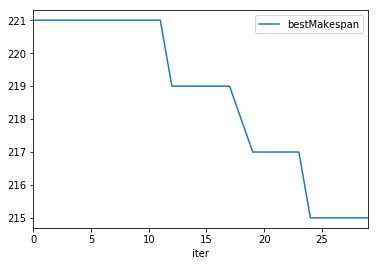

In [227]:
# originalGA类测试

test = originalGA(10, lotNum, lotSizes, machineNum)

test.iterate(30, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, needCalAllMakespan = 1, muteEveryIter = 1, muteResult = 0, \
            startIter = 0, saveDetailsUsingDF = 1)

test.decodeAFixedIndividual(test.getBestIndividualCodes())

test.details.plot(x = 'iter', y = 'bestMakespan')

In [228]:
# 构建原始IMGA类：

class originalIMGA(generalGAModel):
    """
    继承generalGAModel得到
    """
    
    def __init__(self, modelSize, popSize, lotNum, lotSizes, machineNum):
        """
        指定了individual类是generalIndividual，pop类是generalPopulation，solution类是generalSolution
        """
        super(originalIMGA, self).__init__(modelSize, popSize, lotNum, lotSizes, machineNum, generalIndividual, \
                                           generalPopulation, generalSolution)

[254, 268, 264, 297, 346, 318, 283, 346, 271, 315]
[429, 232, 393, 288, 338, 329, 330, 285, 294, 278]
[243, 310, 302, 278, 306, 381, 309, 297, 278, 386]
outerIter: 0 221 [221, 232, 237]
[262, 279, 283, 248, 221, 234, 237, 271, 267, 265]
[279, 278, 271, 232, 276, 285, 221, 329, 272, 288]
[251, 280, 278, 274, 270, 255, 266, 243, 237, 232]
outerIter: 1 221 [221, 221, 224]
[237, 250, 253, 234, 235, 221, 224, 246, 229, 248]
[232, 271, 221, 255, 275, 254, 267, 253, 251, 221]
[270, 224, 260, 250, 232, 267, 221, 244, 242, 266]
outerIter: 2 221 [221, 221, 221]
[234, 243, 232, 221, 224, 234, 223, 224, 221, 229]
[254, 221, 221, 244, 251, 253, 230, 232, 255, 221]
[224, 224, 244, 221, 221, 250, 241, 221, 232, 224]
outerIter: 3 214 [218, 214, 221]
[229, 224, 224, 218, 221, 218, 221, 231, 221, 221]
[221, 253, 214, 221, 218, 222, 230, 228, 221, 230]
[214, 224, 221, 221, 221, 232, 224, 240, 224, 241]
outerIter: 4 209 [209, 214, 211]
[209, 221, 218, 221, 221, 221, 218, 224, 211, 229]
[222, 221, 218, 221

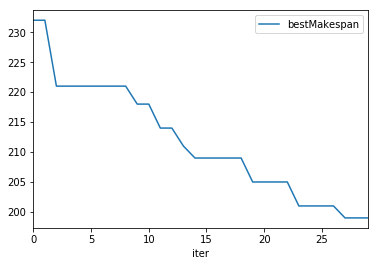

In [229]:
# originalIMGA类测试

test = originalIMGA(3, 10, lotNum, lotSizes, machineNum)

test.modelIterate(10, 3, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 'replace', 10, muteEveryGAIter = 1, \
                     muteGAResult = 1, muteEveryOuterIter = 0, muteOuterResult = 0, saveDetailsUsingDF = 1)

test.decodeAFixedIndividual(test.getBestIndividualCodes())

test.getMakespansOfAllIndividuals()

test.detailsOfModel.groupby(['iter']).min().plot(y = 'bestMakespan')

In [230]:
class comparisonsOfAlgorithms:
    """
    专门构建一个类来做算法对比实验
    有多种功能
    """
    
    def __init__(self, algorithms):
        
        """
        输入：         几个算法类的对象组成的list
        """
        self.algorithms = algorithms
        self.algorithmNum = len(algorithms)
        
        # 构建一个dataframe，记录每次run各个算法的最后结果
        self.columnNames = []
        for algorithmInd in range(self.algorithmNum):
            self.columnNames.append('%s'%(str(type(self.algorithms[algorithmInd])).strip('>').strip('\'').split('.')[-1]))            
        self.makespans = pd.DataFrame(columns=self.columnNames)
        
        # 构建一个list，记录每run的最优个体的编码
        self.bestCodes = []

        # 构建一个dataframe，记录单次运行的收敛过程
        self.oneRunData = pd.DataFrame(columns=self.columnNames)
        
               
    def runManyTimes(self, runNum, restart = 1):
        """
        功能：        传入的多个算法，跑runNum遍
        """
        # 如果restart为0的话，不用清空历史记录和历史最优编码
        if restart == 1:
            self.makespans = pd.DataFrame(columns=self.columnNames)
            self.bestCodes = []
            
        # 开始循环run
        for runInd in range(runNum):
            # 开始循环每个算法
            makespansOfThisRun = []
            for algorithmInd in range(self.algorithmNum):
                # 注意不同的对象要使用不同的操作
                if type(self.algorithms[algorithmInd]).__bases__[0] == generalPopulation:
                    # 除了第一次run不用reset model之外，其他run都要
                    if runInd != 0:
                        self.algorithms[algorithmInd].resetPop()
                    self.algorithms[algorithmInd].iterate(1000, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, needCalAllMakespan = 1, \
                                                     muteEveryIter = 1, muteResult = 0, startIter = 0, saveDetailsUsingDF = 1)
                    makespansOfThisRun.append(self.algorithms[algorithmInd].getBestMakespan())
                    self.bestCodes.append([self.algorithms[algorithmInd].getBestMakespan(), self.algorithms[algorithmInd].getBestIndividualCodes()])
                elif type(self.algorithms[algorithmInd]).__bases__[0] == generalGAModel:
                    # 除了第一次run不用reset model之外，其他run都要
                    if runInd != 0:
                        self.algorithms[algorithmInd].resetModel()
                    self.algorithms[algorithmInd].modelIterate(100, 10, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 'exchange', 10, \
                                                          muteEveryGAIter = 1,  muteGAResult = 1, muteEveryOuterIter = 1, \
                                                          muteOuterResult = 0, saveDetailsUsingDF = 1)
                    makespansOfThisRun.append(self.algorithms[algorithmInd].getBestMakespanAmongAllPops())
                    self.bestCodes.append([self.algorithms[algorithmInd].getBestMakespanAmongAllPops(), self.algorithms[algorithmInd].getBestIndividualCodes()])
            self.makespans.loc[len(self.makespans)] = makespansOfThisRun
            
            
    def saveMakespansDF(self, filename):
        """
        功能          把makespans存到csv
        """        
        self.makespans.to_csv(PATH+"\\"+filename, header = True)


    def plotOneRun(self, fileName, restart = 1):
        """
        功能：        记录各个算法一次run的收敛过程
        """       
        # 如果restart为0的话，不用清空历史记录
        if restart == 1:
            self.oneRunData = pd.DataFrame(columns=self.columnNames)
        
        for algorithmInd in range(self.algorithmNum):
            
            if type(self.algorithms[algorithmInd]).__bases__[0] == generalPopulation:
                self.algorithms[algorithmInd].iterate(200, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, needCalAllMakespan = 1, \
                                                     muteEveryIter = 1, muteResult = 0, startIter = 0, saveDetailsUsingDF = 1)
                self.oneRunData[self.columnNames[algorithmInd]] = self.algorithms[algorithmInd].details.\
                                                                  set_index(["iter"])['bestMakespan']
            elif type(self.algorithms[algorithmInd]).__bases__[0] == generalGAModel:
                self.algorithms[algorithmInd].modelIterate(20, 10, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 'exchange', 10, \
                                                          muteEveryGAIter = 1,  muteGAResult = 1, muteEveryOuterIter = 1, \
                                                          muteOuterResult = 0, saveDetailsUsingDF = 1)
                self.oneRunData[self.columnNames[algorithmInd]] = self.algorithms[algorithmInd].detailsOfModel["bestMakespan"]
        
        self.oneRunData.plot() 
        plt.savefig(PATH+"\\"+fileName,dpi=160)
        plt.show()
        print('figure saved as %s !'%fileName)


In [231]:
# comparisonsOfAlgorithms类测试

print('构建')
originalGATest = originalGA(200, lotNum, lotSizes, machineNum)
originalIMGATest = originalIMGA(3, 66, lotNum, lotSizes, machineNum)
threeIMGATest = threeIMGA(66, lotNum, lotSizes, machineNum)
test = comparisonsOfAlgorithms([originalGATest, originalIMGATest, threeIMGATest])


print('算法各自跑多遍')
test.runManyTimes(20)
print(test.makespans.head())
print(' ')


# print('单次运行算法收敛对比')
# test.plotOneRun('convergComparison.png')
# print(test.oneRunData.head())
# print(' ')

构建
算法各自跑多遍
[288, 570, 256, 301, 325, 302, 266, 473, 373, 304, 427, 278, 321, 277, 386, 266, 272, 369, 326, 291, 327, 544, 427, 357, 268, 399, 295, 487, 302, 369, 261, 321, 332, 321, 340, 300, 361, 302, 286, 257, 374, 305, 254, 246, 292, 323, 377, 296, 329, 329, 345, 273, 289, 313, 349, 374, 302, 283, 349, 582, 271, 268, 369, 369, 261, 334, 297, 233, 258, 223, 310, 333, 297, 279, 321, 316, 277, 294, 342, 308, 241, 265, 301, 289, 537, 281, 325, 262, 466, 372, 280, 302, 258, 241, 329, 369, 295, 253, 386, 300, 301, 408, 319, 382, 391, 369, 270, 383, 319, 251, 582, 242, 466, 255, 293, 609, 331, 300, 314, 301, 358, 382, 258, 298, 289, 369, 277, 446, 446, 302, 302, 288, 269, 293, 461, 560, 232, 292, 269, 268, 392, 631, 361, 268, 249, 324, 293, 277, 329, 319, 369, 304, 367, 467, 251, 330, 445, 293, 250, 317, 284, 344, 381, 268, 267, 301, 331, 342, 307, 438, 382, 435, 260, 349, 282, 268, 267, 244, 349, 297, 425, 487, 277, 329, 276, 358, 369, 471, 308, 281, 295, 555, 389, 327, 256, 284, 428, 274

KeyboardInterrupt: 

In [521]:
test.makespans.mean()

originalGA      185.0
originalIMGA    184.1
threeIMGA       186.7
dtype: float64

In [522]:
test.makespans.min()

originalGA      183.0
originalIMGA    183.0
threeIMGA       185.0
dtype: float64

In [523]:
test.makespans.originalGA.value_counts()[183]

3

In [524]:
test.makespans.originalIMGA.value_counts()[183]

9

In [525]:
test.makespans.threeIMGA.value_counts()[183]

KeyError: 183

In [19]:
class threeIMGA(generalGAModel):
    """
    继承generalGAModel得到
    """
        
    def __init__(self, popSize, lotNum, lotSizes, machineNum):
        """
        指定了modelSize是3，individual类是generalIndividual，pop类是generalPopulation，solution类是generalSolution
        """
        super(threeIMGA, self).__init__(3, popSize, lotNum, lotSizes, machineNum, generalIndividual, \
                                        generalPopulation, generalSolution)


        
    def getBestAndRamdomIndividualOfPopulation(self, popInd, choosePercentage):
        """
        功能：            返回某个种群最优和随机的个体
        
        输入：
        popInd            种群序号
        choosePercentage  最优个体和随机个体分别需要多少个
        """        
        # 先确定分别要选多少个best和random个体
        chooseNum = int(choosePercentage * self.popSize / 100.0)
        
        # 选出最好的个体
        makespanList = [self.model[popInd].pop[i].makespan for i in range(self.popSize)]
        bestIndexs = getBestOrWorstIndexs('best', makespanList, chooseNum)
        
        # 从剩余个体中选出随机个体
        randomPool = [i for i in range(self.popSize) if i not in bestIndexs]
        randomIndexs = random.sample(randomPool, chooseNum)
        
        return bestIndexs, randomIndexs

    
    def getTwoGroupsOfBestIndividual(self, popInd, choosePercentage):
        """
        功能:             返回两组最优个体，随机分组
        输入：
        popInd            种群序号
        choosePercentage  最优个体和随机个体分别需要多少个
        """
        # 先确定分别要选多少个best和random个体
        chooseNum = int(choosePercentage * self.popSize / 100.0)
        
        # 选出最好的个体
        makespanList = [self.model[popInd].pop[i].makespan for i in range(self.popSize)]
        bestIndexs = getBestOrWorstIndexs('best', makespanList, chooseNum * 2)
        
        # 随机分成两组
        random.shuffle(bestIndexs)
        bestIndexs1 = bestIndexs[:chooseNum]
        bestIndexs2 = bestIndexs[chooseNum:]
         
        return bestIndexs1, bestIndexs2
    
    
    def migrationOfAllPops(self, mode, choosePercentage):
        """
        功能:              所有种群进行迁移
        
        输入：
        mode               模式，可以是'replace'，或者是'exchange'
        choosePercentage   选出choosePercentage%个个体，例如可以是10，30等
        """
        pop0Best, pop0Random = self.getBestAndRamdomIndividualOfPopulation(0, choosePercentage = choosePercentage)
        pop1Best, pop1Random = self.getBestAndRamdomIndividualOfPopulation(1, choosePercentage = choosePercentage)
        pop2Best1, pop2Best2 = self.getTwoGroupsOfBestIndividual(2, choosePercentage = choosePercentage)
                
        self.migrateBetweenTwoPops(mode, 0, 1, pop0Best, pop1Best)
        self.migrateBetweenTwoPops(mode, 0, 2, pop0Random, pop2Best1)
        self.migrateBetweenTwoPops(mode, 1, 2, pop1Random, pop2Best2)

        
    def modelIterate(self, outerIterNum, innerIterNum, p1, p2, p3, ps1, ps2, ps3, ps4, ps5, mode, migratePercentage, \
                     muteEveryGAIter = 1, muteGAResult = 1, muteEveryOuterIter = 0, muteOuterResult = 0, **kw):
        
        """
        功能：                      使用简单GA迭代来构建IMGA的迭代
        
        输入：
        outerIterNum                模型要进行多少次migrate
        innerIterNum                每多少个iter就要migrate一次
        p1                          交叉概率
        p2                          segment1变异概率
        p3                          segment2变异概率
        ps1~ps5                     分别是segment1交叉位概率，segment2交叉位概率，segment1的vec内两sublot变异位概率，
                                    segment1的vec重初始化位概率，segment2的vec内部swap变异位概率（注意：一个vec作为一位）
        mode                        模式，可以是'replace'，或者是'exchange'
        muteEveryGAIter             如果为0，打印每次GA迭代种群中最好makespan
        muteGAResult                如果为0，打印inner迭代结束后最好makespan
        muteEveryOuterIter          如果为0，打印每次outer迭代种群中最好makespan
        muteOuterResult             如果为0，打印outer迭代结束后最好makespan
        
        可选输入：
        kw['saveDetailsUsingDF']   是否生成一个DataFrame来记录详细结果
        """       
        # 每次都要重置这个dataframe
        self.detailsOfModel = pd.DataFrame(columns = ['pop', 'iter', 'outerIter', 'bestMakespan'])
        
        # 第一次迭代需要手动计算所有个体的makespan
        self.calAllModelMakespan()
        
        #外部迭代
        for outerIterInd in range(outerIterNum):
            
            # 内部迭代
            for popInd in range(self.modelSize):
                
                # GA
                if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:
                    saveDetailsUsingDF = kw['saveDetailsUsingDF']
                
                # 三个种群有不同的进化参数
                if popInd == 0:
                    self.model[popInd].iterate(innerIterNum, p1, p2, 0, ps1, 0, ps3, ps4, ps5, needcalAllMakespan = 0, \
                                               muteEveryIter = muteEveryGAIter, muteResult = muteGAResult, \
                                               startIter = outerIterInd * innerIterNum,\
                                              saveDetailsUsingDF = saveDetailsUsingDF)
                elif popInd == 1:
                    self.model[popInd].iterate(innerIterNum, p1, 0, p3, 0, ps2, ps3, ps4, ps5, needcalAllMakespan = 0, \
                                               muteEveryIter = muteEveryGAIter, muteResult = muteGAResult, \
                                               startIter = outerIterInd * innerIterNum,\
                                              saveDetailsUsingDF = saveDetailsUsingDF)
                elif popInd == 2:
                    self.model[popInd].iterate(innerIterNum, p1, p2, p3, ps1, ps2, ps3, ps4, ps5, needcalAllMakespan = 0, \
                                               muteEveryIter = muteEveryGAIter, muteResult = muteGAResult, \
                                               startIter = outerIterInd * innerIterNum,\
                                              saveDetailsUsingDF = saveDetailsUsingDF)
                
                # 记录到dataframe里
                if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:
                    self.model[popInd].details['pop'] = popInd
                    self.model[popInd].details['outerIter'] = outerIterInd
                    self.detailsOfModel = self.detailsOfModel.append(self.model[popInd].details, ignore_index=True)
#                     self.detailsOfModel = pd.concat([self.detailsOfModel, self.model[popInd].details], ignore_index=True)
            
            # 打印完整外部迭代一代后的结果
            if muteEveryOuterIter == 0:
                print('outerIter: %d'%outerIterInd, self.getBestMakespanAmongAllPops(), self.getBestMakespanOfEveryPop())
            
            # 每个外部迭代一代，就迁移一次，迁移的mode在此指定
            self.migrationOfAllPops(mode, choosePercentage = migratePercentage,)
            
        if muteOuterResult == 0:
            print('result after {num1} outerIteration and {num2} innerIteration which is {num3} in total:'.\
                  format(num1 = outerIterNum, num2 = innerIterNum, num3 = outerIterNum * innerIterNum), \
                  self.getBestMakespanAmongAllPops())
            
        # 整理一下这个dataframe
        if 'saveDetailsUsingDF' in kw.keys() and kw['saveDetailsUsingDF'] == 1:    
            self.detailsOfModel = self.detailsOfModel.groupby(['iter']).min()

In [20]:
# 测试threeIMGA类

print('创建并计算makespan')
# test = threeIMGA(66, lotNum, lotSizes, machineNum)
test = threeIMGA(10, lotNum, lotSizes, machineNum)
test.calAllModelMakespan()
print(test.getBestAndRamdomIndividualOfPopulation(0,20))
print(test.getTwoGroupsOfBestIndividual(0,20))
print(test.getCertainIndividualOfPopulation(0, 'best', 40))
for item in test.getMakespansOfAllIndividuals():
    print(item)  
print(' ')


print('独特的migrate')
test.migrationOfAllPops('exchange', 10)
for item in test.getMakespansOfAllIndividuals():
    print(item)  
    
# test.modelIterate(40, 20, 0.5, 0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 'exchange', 10, \
#                                                           muteEveryGAIter = 1,  muteGAResult = 1, muteEveryOuterIter = 0, \
#                                                           muteOuterResult = 0, saveDetailsUsingDF = 1)
test.modelIterate(10, 5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 'exchange', 10, \
                                                          muteEveryGAIter = 1,  muteGAResult = 1, muteEveryOuterIter = 0, \
                                                          muteOuterResult = 0, saveDetailsUsingDF = 1)

创建并计算makespan
([6, 8], [5, 2])
([8, 3], [6, 7])
[6, 8, 7, 3]
[465, 466, 303, 293, 446, 327, 251, 281, 266, 331]
[305, 329, 422, 270, 369, 343, 344, 220, 358, 247]
[269, 579, 440, 369, 335, 319, 323, 286, 272, 350]
 
独特的migrate
[465, 466, 272, 293, 446, 327, 220, 281, 266, 331]
[305, 329, 422, 270, 369, 343, 269, 251, 358, 247]
[344, 579, 440, 369, 335, 319, 323, 286, 303, 350]
outerIter: 0 220 [220, 227, 238]
outerIter: 1 220 [227, 220, 245]
outerIter: 2 212 [220, 212, 246]
outerIter: 3 212 [212, 220, 213]
outerIter: 4 212 [220, 212, 237]
outerIter: 5 212 [212, 219, 213]
outerIter: 6 212 [219, 212, 220]
outerIter: 7 212 [212, 213, 217]
outerIter: 8 212 [213, 212, 222]
outerIter: 9 212 [212, 212, 217]
result after 10 outerIteration and 5 innerIteration which is 50 in total: 212


In [459]:
for item in test.getMakespansOfAllIndividuals():
    print(item) 

[230, 228, 227, 217, 226, 220, 240, 215, 224, 279]
[227, 218, 224, 223, 227, 226, 227, 242, 226, 220]
[243, 235, 237, 229, 235, 302, 264, 255, 263, 250]


In [483]:
test.detailsOfModel

,bestMakespan,outerIter,pop
iter,,,
0,247,0,0
1,244,0,0
2,241,0,0
3,228,0,0
4,228,0,0
5,228,1,0
6,228,1,0
7,228,1,0
8,220,1,0
